<a href="https://colab.research.google.com/github/rahulll-gif/task1/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (7).zip to archive (7) (2).zip
Extracted archive (7) (2).zip to /content/data
Dataset loaded successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


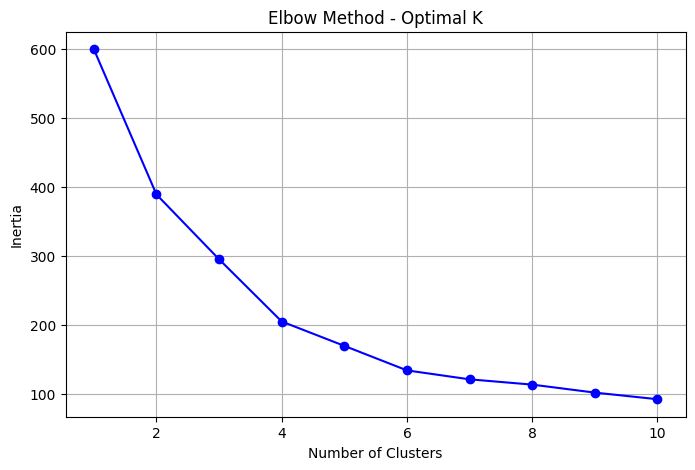

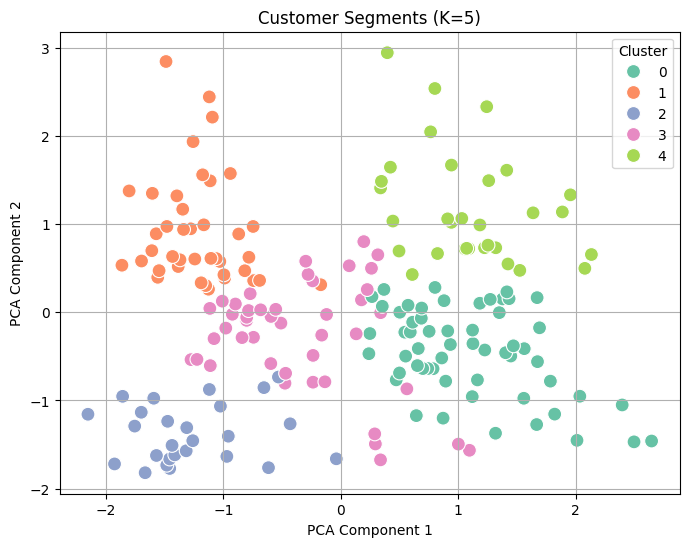

🔍 Silhouette Score for K=5: 0.4085


In [4]:
from google.colab import files
uploaded = files.upload()
import zipfile
import io
import os

extract_path = '/content/data'
for file_name in uploaded.keys():
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Extracted {file_name} to {extract_path}")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
csv_file = None
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith('.csv'):
            csv_file = os.path.join(root, file)
            break

df = pd.read_csv(csv_file)
print("Dataset loaded successfully!")
print(df.head())
X = df.drop(['CustomerID', 'Gender'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=100)
plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
score = silhouette_score(X_scaled, labels)
print(f"🔍 Silhouette Score for K={optimal_k}: {score:.4f}")
